[Fish Market](https://www.kaggle.com/aungpyaeap/fish-market)

**Goal**: Classify fish species and find feature weights

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [3]:
fish = pd.read_csv('Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Modifications/Cleaning

In [6]:
fish['Weight'] = pd.to_numeric(fish['Weight'],errors='coerce')
fish['Length1'] = pd.to_numeric(fish['Length1'],errors='coerce')
fish['Length2'] = pd.to_numeric(fish['Length2'],errors='coerce')
fish['Length3'] = pd.to_numeric(fish['Length3'],errors='coerce')
fish['Height'] = pd.to_numeric(fish['Weight'],errors='coerce')
fish['Width'] = pd.to_numeric(fish['Weight'],errors='coerce')
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Visualizations

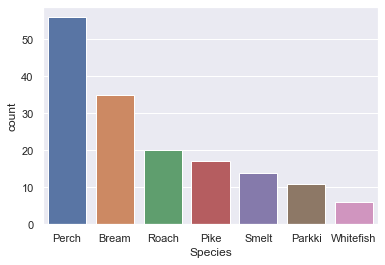

In [7]:
sns.countplot(fish['Species'],order=fish['Species'].value_counts().index)

## Preprocessing and Model Building

In [8]:
fish['Species'] = fish['Species'].map({'Perch':0,'Bream':1,'Roach':2,'Pike':3,
                                       'Smelt':4,'Parkki':5,'Whitefish':6})
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,242.0,242.0
1,1,290.0,24.0,26.3,31.2,290.0,290.0
2,1,340.0,23.9,26.5,31.1,340.0,340.0
3,1,363.0,26.3,29.0,33.5,363.0,363.0
4,1,430.0,26.5,29.0,34.0,430.0,430.0


In [9]:
# Split training and testing sets
from sklearn.model_selection import train_test_split

In [10]:
X = fish.drop('Species',axis=1)
y = fish['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
# Standardizing values
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmod = LogisticRegression()
logmod.fit(X_train,y_train,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# K-Folds Cross Validation
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(logmod,X_train,y_train,scoring='accuracy',
                cv=5,verbose=2).mean()

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.717141795402665

71.7% is not too bad, but it is time to utilize GridSearchCV to find better parameters improve the model's accuracy.

In [17]:
# Parameter Tweaking
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C':[100,10,1,.1,.01,.001]}
grid = GridSearchCV(logmod,param_grid,cv=5,verbose=2)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [20]:
# From the parameters tested, C=100 looks to perform the best
grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction = grid.predict(X_test)

## Evaluations

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
# Perch:0, Bream:1, Roach:2, Pike:3, Smelt:4, Parkki:5, Whitefish:6
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))
print('\n')
print(f'accuracy score = {accuracy_score(y_test,prediction)}')

[[10  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  1  4  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  2  1  0  1  0  0]
 [ 1  0  0  0  0  0  0]]


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.70      1.00      0.82         7
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         4
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         1

    accuracy                           0.81        32
   macro avg       0.56      0.69      0.61        32
weighted avg       0.70      0.81      0.75        32



accuracy score = 0.8125


Definitely a better accuracy score than I got from the cross validation test before, going to 71.7% to 81.25%! The F1-Score for fishes 0-4 is good too, but the F1-Score for fishes 5-6 did not do too well and is non-existant. The reason for this is likely because there was not a large enough sample size for those fishes, as seen in the countplot in the visualization section. All in all, the model did a good job with an overall F1-Score of 75%.

In [24]:
# Time to check the log odds ratio, which is the exponentiated value of the coefficient
# Each column represents the species of fish from 0-6
# Each row represents the independent features
odds_ratio = np.exp(logmod.coef_)
print(odds_ratio)

[[ 1.06792123  2.57231692  3.06854735  0.09834109  1.06792123  1.06792123]
 [ 1.44240841  0.14434754  0.2921407  15.14459196  1.44240841  1.44240841]
 [ 0.52200075  1.14446257  0.96133109  2.05484853  0.52200075  0.52200075]
 [ 0.43828747  4.73128889  4.23869555  3.30047075  0.43828747  0.43828747]
 [ 1.46373104  0.40307667  0.31914185  0.31269099  1.46373104  1.46373104]
 [ 0.89201093  0.77224378  0.79493686  1.01336649  0.89201093  0.89201093]
 [ 0.99674417  0.94764277  1.05912219  1.06301638  0.99674417  0.99674417]]


In [25]:
pd.DataFrame(odds_ratio,index=[['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish']],
            columns=X.columns)

,Weight,Length1,Length2,Length3,Height,Width
Perch,1.067921,2.572317,3.068547,0.098341,1.067921,1.067921
Bream,1.442408,0.144348,0.292141,15.144592,1.442408,1.442408
Roach,0.522001,1.144463,0.961331,2.054849,0.522001,0.522001
Pike,0.438287,4.731289,4.238696,3.300471,0.438287,0.438287
Smelt,1.463731,0.403077,0.319142,0.312691,1.463731,1.463731
Parkki,0.892011,0.772244,0.794937,1.013366,0.892011,0.892011
Whitefish,0.996744,0.947643,1.059122,1.063016,0.996744,0.996744


Large odds ratio values (positive or negative) indicate that an independent feature is a good predictor for classifying a certain species of fish. For example, the odds are 4.731289 times greater that the fish is a Pike, given that there is a single unit of increase in Length1.

In [26]:
# Probability, which is i/(1+i) for i is equal to odds ratio
probability = []
for i in odds_ratio:
    probability.append((i/(1+i)))

In [27]:
pd.DataFrame(probability,index=[['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish']],
            columns=X.columns)

,Weight,Length1,Length2,Length3,Height,Width
Perch,0.516423,0.720070,0.754212,0.089536,0.516423,0.516423
Bream,0.590568,0.126140,0.226090,0.938060,0.590568,0.590568
Roach,0.342970,0.533683,0.490142,0.672652,0.342970,0.342970
Pike,0.304729,0.825519,0.809113,0.767467,0.304729,0.304729
Smelt,0.594112,0.287281,0.241931,0.238206,0.594112,0.594112
Parkki,0.471462,0.435744,0.442877,0.503319,0.471462,0.471462
Whitefish,0.499185,0.486559,0.514356,0.515273,0.499185,0.499185
